In [1]:
import isodisreg
from isodisreg import idr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get data
rain = isodisreg.load_rain()
varNames = rain.columns[3:55]

## Example 1: idr() and predict()

In [3]:
X = rain[varNames][0:185]
y = rain['obs'][0:185]
data = rain[varNames][185:186]

# Define groups and orders
values = np.ones(52)+1
values[0:2] = 1
groups = dict(zip(varNames, values))
orders = dict({"1":"comp", "2":"icx"})

# compute idr
fit = idr(y = y, X = X, orders = orders, groups = groups)

# fit idr / make prediction
preds1 = fit.predict()
preds2 = fit.predict(data)

100%|██████████| 41/41 [00:00<00:00, 287.46it/s]


## Example 2: cdf(), qpred(), qscore(), bscore() and crps()

In [4]:
# cdf
X = rain[["HRES"]][0:(3*365)]
y = rain['obs'][0:(3*365)]
data = pd.DataFrame({"HRES": [0, 0.5, 1]}, columns = ["HRES"])
fit = idr(y = y, X = X)
preds1 = fit.predict(data)
cdf0 = preds1.cdf(thresholds = 0)
print(1-np.array(cdf0))

[0.031 0.348 0.683]


In [5]:
# qpred
data = pd.DataFrame({"HRES": [2.5, 5, 10]}, columns = ["HRES"])
preds2 = fit.predict(data)
qpredict = preds2.qpred(quantiles = 0.95)
print(qpredict)
# qscore
data = rain[["HRES"]][(3*365):(5*365)]
obs = rain["obs"][(3*365):(5*365)]
preds3 = fit.predict(data)

[ 7.4 11.  19. ]


In [6]:
obs = rain["obs"][(3*365):(5*365)]
print("Mean Qscore:", np.round(np.mean(preds3.qscore(0.5, obs)),3))

# bscore
idrBscore = np.round(np.mean(preds3.bscore(thresholds = 0, y = obs)), 3)
print("Mean Bscore:", idrBscore)

# crps
idrCRPS = np.round(np.mean(preds3.crps(obs)), 3)
print("Mean CRPS:", idrCRPS)

Mean Qscore: 1.136
Mean Bscore: 0.389
Mean CRPS: 0.845


## Example 3: pit()

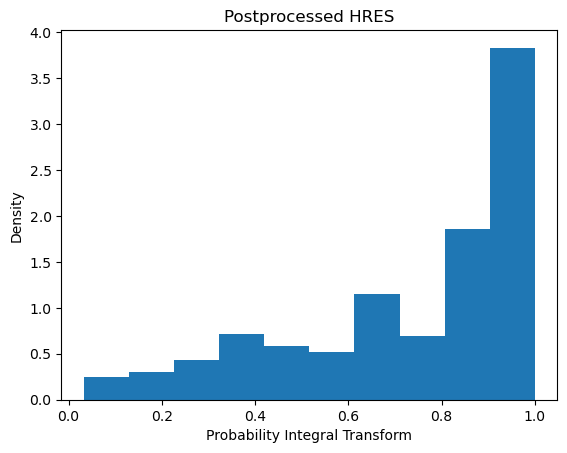

In [27]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

X = rain[["HRES"]][0:4*365]
y = rain["obs"][0:4*365]
fit = idr(y = y, X = X)
data = rain[["HRES"]][4*365:8*365]
obs = rain["obs"][4*365:8*365]
preds = fit.predict(data = data)

idrPIT = preds.pit(y = obs, seed = 123)
a, b, x = plt.hist(idrPIT[::-1], density = True)

plt.title("Postprocessed HRES")
plt.xlabel("Probability Integral Transform")
plt.ylabel("Density")
plt.show()

In [56]:
rain['HRES'].to_frame()

,HRES
0,1.638293
1,7.348537
2,0.140810
3,3.667116
4,1.253366
...,...
3612,0.084840
3613,0.016928
3614,0.003815
3615,0.038844


In [65]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

with (ro.default_converter + pandas2ri.converter).context():
    y = ro.conversion.get_conversion().py2rpy(rain)
    y_train = y[1][:4*365]
    y_test = y[1][4*365:8*365]
    X_train = ro.conversion.get_conversion().py2rpy(rain['HRES'][:4*365].to_frame())
    X_test = ro.conversion.get_conversion().py2rpy(rain['HRES'][4*365:8*365].to_frame())




In [36]:
from rpy2.robjects.packages import importr
utils = importr('utils')
utils.install_packages('isodistrreg',repos='https://cran.r-project.org')

R[write to console]: also installing the dependency ‘osqp’


R[write to console]: trying URL 'https://cran.r-project.org/src/contrib/osqp_0.6.3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 144332 bytes (140 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

Making fixes to osqp_sources for CRAN
[1] TRUE


+ echo -- Trying to build libosqp.a via cmake ...
+ cd src/osqp_sources
+ mkdir -p build
+ cd build
+ cmake -DR_HOME=/home/n/nath/anaconda3/envs/ai-models/lib/R -DCMAKE_BUILD_TYPE=Release -DBUILD_SHARED_LIBS:bool=OFF -DCMAKE_POSITION_INDEPENDENT_CODE:bool=ON -DR_LANG=TRUE -DCMAKE_INSTALL_PREFIX:PATH=../../ ..


-- Trying to build libosqp.a via cmake ...
-- The C compiler identification is GNU 11.2.0
-- The CXX compiler identification is GNU 11.2.0
-- Check for working C compiler: /home/n/nath/anaconda3/envs/ai-models/bin/x86_64-conda-linux-gnu-cc
-- Check for working C compiler: /home/n/nath/anaconda3/envs/ai-models/bin/x86_64-conda-linux-gnu-cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /home/n/nath/anaconda3/envs/ai-models/bin/x86_64-conda-linux-gnu-c++
-- Check for working CXX compiler: /home/n/nath/anaconda3/envs/ai-models/bin/x86_64-conda-linux-gnu-c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- We are on a Linux system
-- Embedded is OFF
-- Printing is ON
-- Profiling is ON
-- User interrupt is ON
-- Floats are OFF
-- Long int

+ cmake --build . --target install


Scanning dependencies of target qdldlobject
[  2%] Building C object lin_sys/direct/qdldl/qdldl_sources/CMakeFiles/qdldlobject.dir/src/qdldl.c.o
[  2%] Built target qdldlobject
Scanning dependencies of target linsys_pardiso
[  5%] Building C object lin_sys/direct/CMakeFiles/linsys_pardiso.dir/pardiso/pardiso_interface.c.o
[  8%] Building C object lin_sys/direct/CMakeFiles/linsys_pardiso.dir/pardiso/pardiso_loader.c.o
[  8%] Built target linsys_pardiso
Scanning dependencies of target linsys_qdldl
[ 11%] Building C object lin_sys/direct/qdldl/CMakeFiles/linsys_qdldl.dir/amd/src/amd_1.c.o
[ 13%] Building C object lin_sys/direct/qdldl/CMakeFiles/linsys_qdldl.dir/amd/src/amd_2.c.o
[ 16%] Building C object lin_sys/direct/qdldl/CMakeFiles/linsys_qdldl.dir/amd/src/amd_aat.c.o
[ 19%] Building C object lin_sys/direct/qdldl/CMakeFiles/linsys_qdldl.dir/amd/src/amd_control.c.o
[ 22%] Building C object lin_sys/direct/qdldl/CMakeFiles/linsys_qdldl.dir/amd/src/amd_defaults.c.o
[ 25%] Building C object

+ cd ..
+ rm -rf build/
+ cd ../../
+ echo -- Built libosqp.a
** libs
using C++ compiler: ‘x86_64-conda-linux-gnu-c++ (Anaconda gcc) 11.2.0’
using C++17


x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/n/nath/anaconda3/envs/ai-models/lib/R/include" -DNDEBUG  -I'/home/n/nath/anaconda3/envs/ai-models/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/n/nath/anaconda3/envs/ai-models/include -I/home/n/nath/anaconda3/envs/ai-models/include -Wl,-rpath-link,/home/n/nath/anaconda3/envs/ai-models/lib   -I./include/osqp/ -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/n/nath/anaconda3/envs/ai-models/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1709218169200/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/n/nath/anaconda3/envs/ai-models=/usr/local/src/conda-prefix  -c RcppExports.cpp -o RcppExports.o
x86_64-conda-linux-gnu-c++ -std=gnu++17 -shared -L/home/n/nath/anaconda3/envs/ai-models/lib/R/lib -Wl,-O2 -Wl,--sort-common -Wl,--as-ne

installing to /home/n/nath/anaconda3/envs/ai-models/lib/R/library/00LOCK-osqp/00new/osqp/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (osqp)
* installing *source* package ‘isodistrreg’ ...
** package ‘isodistrreg’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C++ compiler: ‘x86_64-conda-linux-gnu-c++ (Anaconda gcc) 11.2.0’


x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/n/nath/anaconda3/envs/ai-models/lib/R/include" -DNDEBUG  -I'/home/n/nath/anaconda3/envs/ai-models/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/n/nath/anaconda3/envs/ai-models/include -I/home/n/nath/anaconda3/envs/ai-models/include -Wl,-rpath-link,/home/n/nath/anaconda3/envs/ai-models/lib    -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/n/nath/anaconda3/envs/ai-models/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1709218169200/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/n/nath/anaconda3/envs/ai-models=/usr/local/src/conda-prefix  -c RcppExports.cpp -o RcppExports.o
x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/n/nath/anaconda3/envs/ai-models/lib/R/include" -DNDEBUG  -I'/home/n/nath/anaconda3/envs/ai-models/lib/R

installing to /home/n/nath/anaconda3/envs/ai-models/lib/R/library/00LOCK-isodistrreg/00new/isodistrreg/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (isodistrreg)
R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/user/28197/Rtmpd4IVrb/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Updating HTML index of packages in '.Library'

R[write to console]: Making 'packages.html' ...
R[write to console]:  done



<rpy2.rinterface_lib.sexp.NULLType object at 0x7f71eb78b000> [RTYPES.NILSXP]

In [1]:
preds

NameError: name 'preds' is not defined

In [77]:
idr = importr('isodistrreg')

idr_fit = idr.idr(y=ro.FloatVector(y_train),X=X_test)
preds = ro.r.predict(idr_fit, X_test)



(array([175., 136., 145., 143., 154., 152., 169., 109., 173., 104.]),
 array([0.0012767 , 0.10114903, 0.20102136, 0.30089369, 0.40076602,
        0.50063835, 0.60051068, 0.70038301, 0.80025534, 0.90012767,
        1.        ]),
 <BarContainer object of 10 artists>)

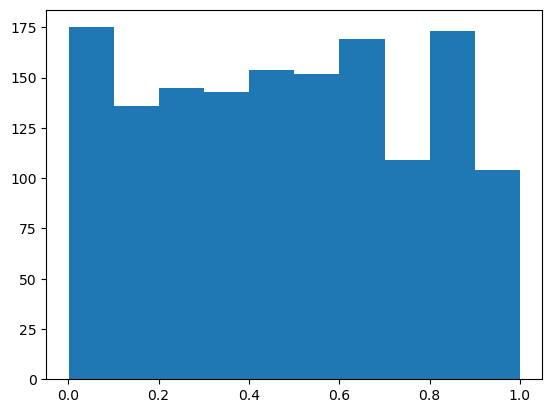

In [82]:
pit = ro.r.pit(preds, ro.FloatVector(y_test))

plt.hist(np.asarray(pit))


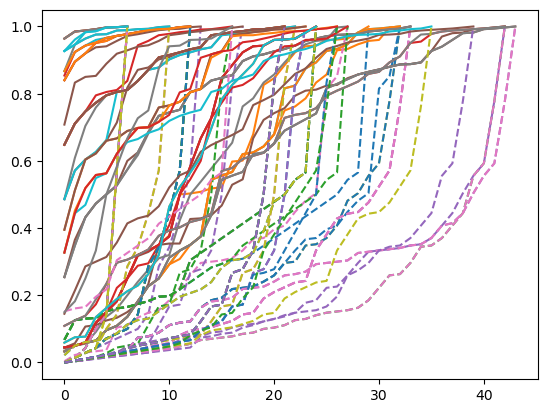

In [20]:
for pred in preds.predictions[-200:-150]:
    plt.plot(pred.points/np.max(pred.points), linestyle='dashed')
    plt.plot(pred.ecdf)

## Example 4: plot()

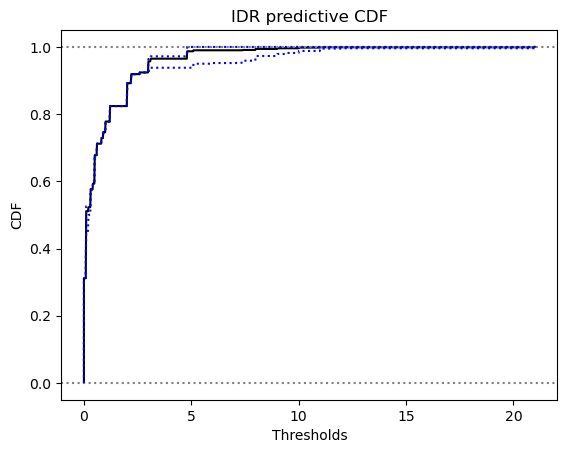

In [22]:
X = rain[["HRES"]][0:2*365]
y = rain["obs"][0:2*365]
fit = idr(y = y, X = X)
data = pd.DataFrame({"HRES": [1], "CTR": [0]}, columns = ["HRES", "CTR"])
preds = fit.predict(data = data)
preds.plot()